# Thành viên
| ID       | Họ tên              | Tỉ lệ hoàn thành |
|----------|---------------------|------------------|
| 19127399 | Huỳnh Cao Nhật Hiếu | 100%             |
| 19127444 | Ngô Đăng Khoa       | 100%             |                              
| 19127134 | Nguyễn Gia Hân      | 100%             |
| 19127637 | Nguyễn Khắc Vỹ      | 100%             |

## Phân công công việc:
    - Nguyễn Khắc Vỹ: Trực quan line, bar và pie chart(các biến độc lập)
    - Nguyễn Gia Hân: Thu thập, khám phá và tiền xử lí dữ liệu + trực quan line graph (các biến độc lập)
    - Ngô Đăng Khoa: Trực quan heatmap, bubble chart, và new pie chart (các biểu đồ quan hệ)
    - Huỳnh Cao Nhật Hiếu: Trực quan 100% stack bar chart, histogram, scatter (các biểu đồ quan hệ) + hoàn thiện notebook.

## Mức độ hoàn thành công việc:
| Công việc                         | Tỉ lệ hoàn thành   |
|-----------------------------------|--------------------|
| Thu thập dữ liệu                  | 100%               |
| Khám phá dữ liệu                  | 100%               |   
| Tiền xử lí dữ liệu                | 100%               |
| Trực quan hóa dữ liệu             | 100%               |

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# THƯ VIỆN

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import datetime
import math
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# THU THẬP DỮ LIỆU

- Thu thập dữ liệu từ trang https://www.worldometers.info/coronavirus/ bằng cách
parse HTML, lấy số liệu về tình hình dịch COVID19 của tất cả nước trên thế giới và
châu lục
- Dữ liệu thu thập về gồm tất cả cột trong bảng trên trang Worldometer ( 22 thuộc
tính - `#`, `Country,Other`, `TotalCases`, `NewCases`, `TotalDeaths`, `NewDeaths`,
`TotalRecovered`, `NewRecovered`, `ActiveCases`, `Serious,Critical`, `Tot Cases/1M pop`,
`Deaths/1M pop`, `TotalTests`, `Tests/1M pop`, `Population`, `Continent`, `1 Caseevery X
ppl`, `1 Deathevery X ppl`, `1 Testevery X ppl`, `New Cases/1M pop`, `New Deaths/1M
pop`, `Active Cases/1M pop`)
- Trên trang Worldometer thể hiện 3 ngày ( Now – Yesterday – 2 Days ago), tuy
nhiên để số liệu được hoàn chỉnh trong 1 ngày thì bài làm chỉ lấy số liệu của
Yesterday
- Dữ liệu được lấy trong 4 ngày ( dữ liệu của ngày 15/3/2022 đến ngày 18/3/2022).
Dữ liệu gốc của mỗi ngày được lưu vào file csv dưới tên có định dạng
‘ngày/tháng/năm’ ( thời gian lấy dữ liệu ). Tất cả file dữ liệu gốc sẽ được lưu vào
thư mục ‘RawData’

- Dùng hàm `CollectRawData` để thu thập dữ liệu:

In [2]:
def CollectRawData (filename):
    r = requests.get('https://www.worldometers.info/coronavirus/')
    r.encoding = "utf-8"
    soup = BeautifulSoup(r.text, 'html.parser')
    table = soup.find('table',id = 'main_table_countries_yesterday')
    
    data = {}
    cols_name = table.find('thead').find_all('th')
    for col_name in cols_name:
        col_name = col_name.text
        if '\n' in col_name:
            col_name = col_name.replace('\n','')
        data[col_name] = []
        
    rows = table.find('tbody').find_all('tr')
    key = list(data.keys())
    for row in rows:
        vals = row.find_all('td')
        for i in range(len(key)):
            vals[i] = vals[i].text
            if vals[i] == None:
                vals[i] ==''
            if '\n' in vals[i]:
                vals[i] = vals[i].replace('\n','')
            data[key[i]].append(vals[i])
    
    df = pd.DataFrame(data)
    df.to_csv(filename, sep='\t', index=False, encoding= 'utf-8') 

+ Sử dụng Requests để lấy toàn bộ dữ liệu từ trang web về
+ Dùng thư viện BeautifulSoup để parse dữ liệu
    > Lấy dữ liệu của cả table bằng id ‘main_table_countries_yesterday’  
    > Dùng tag ‘thead’ và tag ‘th’ để lấy các tên cột  
    > Dùng tag ‘tbody’ và tag ‘tr’ để lấy dữ liệu các hàng  
    > Trên mỗi hàng, dùng tag ‘td’ để lấy dữ liệu mỗi ô  
    > Lưu vào file csv  

In [3]:
#CollectRawData ('RawData/18-3-2022.csv')

# Khám phá, kiểm tra dữ liệu

Lấy ngày 15-03-2022 để khám phá, kiểm tra dữ liệu

In [4]:
data = pd.read_csv('RawData/15-03-2022.csv', sep='\t')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    227 non-null    float64
 1   Country,Other        234 non-null    object 
 2   TotalCases           235 non-null    object 
 3   NewCases             160 non-null    object 
 4   TotalDeaths          235 non-null    object 
 5   NewDeaths            102 non-null    object 
 6   TotalRecovered       223 non-null    object 
 7   NewRecovered         130 non-null    object 
 8   ActiveCases          224 non-null    object 
 9   Serious,Critical     169 non-null    object 
 10  Tot Cases/1M pop     226 non-null    object 
 11  Deaths/1M pop        217 non-null    object 
 12  TotalTests           211 non-null    object 
 13  Tests/1M pop         211 non-null    object 
 14  Population           227 non-null    object 
 15  Continent            232 non-null    obj

a. Dữ liệu có bao nhiêu dòng, bao nhiêu cột ?
- Dữ liệu gồm 232 hàng, 22 cột  

b. Ý nghĩa mỗi dòng, có vấn đề các dòng có ý nghĩa khác nhau không ?
- Mỗi dòng tương ứng với số liệu của mỗi quốc gia hoặc mỗi châu lục\
$\rightarrow$ Nên tách số liệu của quốc gia và châu lục ra riêng để dễ xử lí và trực quan


c. Dữ liệu có các dòng bị lặp không ?

In [6]:
duplicated = True
if len(data['Country,Other']) == len(set(data['Country,Other'])):
    duplicated = False
duplicated

False

Sử dụng cột Country, Other để kiểm tra trùng lắp, biến duplicated trả về False  
$\rightarrow$ Dữ liệu không bị lặp

d. Mỗi cột có ý nghĩa gì ?
Các cột là số liệu về các thông tin của dịch COVID19 ở các nước
> ‘#’: số thứ tự\
> ‘Country,Other’: Tên của nước hoặc châu lục\
> ‘TotalCases’: Tổng số ca mắc Covid\
> ‘NewCases’: Số ca mắc Covid thêm trong ngày+ ‘TotalDeaths’: Tổng số ca chết vì Covid\
> ’ NewDeaths’: Số ca chết vì Covid thêm trong ngày\
> ‘TotalRecovered’: Tổng số ca đã khỏi sau khi mắc Covid\
> ‘NewRecovered’: Số ca đã khỏi sau khi mắc Covid trong ngày\
> ‘ActiveCases’: Tổng số ca đang nhiễm Covid\
> ‘Serious,Critical’: Số ca đang nguy cấp vì Covid\
> Tot Cases/1M pop: Tổng số ca mắc Covid trên 1 triệu dân\
> Deaths/1M pop: Tổng số ca chết Covid trên 1 triệu dân\
> TotalTests: Tổng số lần test Covid\
> Tests/1M pop: Tổng số lần test Covid trên 1 triệu dân\
> Population: Dân số của đất nước hoặc châu lục đó\
> Continent: Đất nước đó thuộc châu lục nào\
> 1 Caseevery X ppl: Cứ X người thì sẽ có 1 ca nhiễm Covid\
> 1 Deathevery X ppl: Cứ X người thì sẽ có 1 ca chết vì covid\
> 1 Testevery X ppl: Cứ X người thì sẽ có 1 lần test Covid\
> New Cases/1M pop: Số ca mắc covid thêm trong ngày trên 1 triệu dân\
> New Deaths/1M pop: Số ca chết thêm vì covid trong ngày trên 1 triệu dân\
> Active Cases/1M pop: Số ca đang nhiễm covid trên 1 triệu dân

$\rightarrow$ Không dùng đến 6 cột cuối nên ở bước tiền xử lí sẽ xóa khỏi dữ liệu

e. Mỗi cột đang có kiểu dữ liệu gì ? Có cột nào có kiểu dữ liệu chưa phù hợp để có
thể xử lí tiếp không ?
- Ta có thể thấy kiểu dữ liệu của từng cột ở trên, ngoài cột `#`, `Country,Other`,
`Continent` thì các cột còn lại có kiểu dữ liệu chưa phù hợp ( nên là kiểu dữ liệu
dạng số )

d. Có giá trị thiếu ở các cột hay không ?
- Ngoài cột `TotalCases` thì các cột còn lại đều có giá trị thiếu

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# TIỀN XỬ LÝ DỮ LIỆU

Dùng hàm DataProcessing để thu thập dữ liệu:

In [7]:
'''Hàm Tiền xử lí dữ liệu'''
def DataProcessing(fileraw, filecountry, filecontinent):
    data = pd.read_csv(fileraw, sep='\t', na_values=[' '])
    
    # Xóa các cột không cần thiết
    del data['1 Caseevery X ppl']
    del data['1 Deathevery X ppl']
    del data['1 Testevery X ppl']
    del data['New Cases/1M pop']
    del data['New Deaths/1M pop']
    del data['Active Cases/1M pop']
    
    #Xử lí kiểu dữ liệu, giá trị thiếu
    for name in data.keys():
        if name != 'Country,Other' and name != '#' and name != 'Continent':
            vals = data[name]
            new_vals=[]
            for val in vals:
                if (not isinstance(val, str) and math.isnan(val)):
                    new_vals.append(val)
                    continue
                else:
                    if ',' in val:
                        val = val.replace(',','')
                    if '+' in val:
                        val = val.replace('+','')
                    new_vals.append(val)
            data[name] = new_vals

    # Tách dataset chính thành 2 dataset nhỏ: dataset số liệu các châu lục-thế giới và dataset các quốc gia trên thế giới. 
    data_continent = data.drop(data.index[8:], axis=0)
    data.drop(data.index[0:8], axis=0, inplace=True)
    data_country = data.reset_index(drop=True)

    # Lưu vào 2 file csv.
    data_country.to_csv(filecountry, sep='\t', index=False, encoding= 'utf-8')
    data_continent.to_csv(filecontinent, sep='\t', index=False, encoding= 'utf-8')

Xóa các cột không dùng đến
Xử lí kiểu dữ liệu, giá trị thiếu
- Xử lí các cột không phải ‘Country,Other’, ‘#’, ‘Continent’
    + Chuyển kiểu dữ liệu bằng cách bỏ dấu ‘,’ dấu ‘+’ trong các số. Khi dùng to_csv, dữ liệu sẽ tự chuyển đổi thành dạng số
- Đối với giá trị thiếu (miss value), trong trường hợp này nếu thay các số liệu thành 0 hay giá trị trên dưới sẽ làm sai lệch dữ liệu khá nhiều\
$\rightarrow$ Cách tốt nhất là để nguyên, khi visualize hay thống kê sẽ bỏ qua các ô giá trị thiếu


In [8]:
#DataProcessing('RawData/18-3-2022.csv', 'ProcessingData/18-3-2022_country.csv', 'Processing/18-3-2022_continent.csv')

Ta tiến hành chia dataset thành 2 dataset nhỏ thể hiện bảng số liệu của các châu lục-thế giới và các quốc gia trên thế giới.

In [9]:
continent_data = pd.read_csv('ProcessingData/15-03-2022_continent.csv', sep='\t')
country_data =  pd.read_csv('ProcessingData/15-03-2022_country.csv', sep='\t')

In [10]:
'''Dataframe thể hiện số liệu của các châu lục và thế giới'''
continent_data

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,NaN,Asia,127820351,734123.0,1376074,1639.0,113342911,331791.0,13101366,29002,NaN,NaN,NaN,NaN,NaN,Asia
1,NaN,North America,95805128,45774.0,1424686,1002.0,69309904,194676.0,25070538,9668,NaN,NaN,NaN,NaN,NaN,North America
2,NaN,South America,55352084,67549.0,1269021,468.0,50325708,176511.0,3757355,12367,NaN,NaN,NaN,NaN,NaN,South America
3,NaN,Europe,166597033,771242.0,1743316,2113.0,147327746,779725.0,17525971,11844,NaN,NaN,NaN,NaN,NaN,Europe
4,NaN,Africa,11645050,11342.0,251809,25.0,10804954,13295.0,588287,1512,NaN,NaN,NaN,NaN,NaN,Africa
5,NaN,Oceania,4312101,56946.0,8295,30.0,3754838,19618.0,548968,159,NaN,NaN,NaN,NaN,NaN,Australia/Oceania
6,NaN,NaN,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,World,461532468,1686976.0,6073216,5277.0,394866767,1515616.0,60592485,64552,59210.0,779.1,NaN,NaN,NaN,All


In [11]:
'''Dataframe thể hiện số liệu của các quốc gia trên thế giới'''
country_data

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,1.0,China,120504,3602.0,4636.0,NaN,103884.0,149.0,11984.0,8.0,84.0,3.0,160000000.0,111163.0,1.439324e+09,Asia
1,2.0,USA,81244936,25359.0,992302.0,901.0,56456450.0,174444.0,23796184.0,3726.0,243030.0,2968.0,967406638.0,2893828.0,3.343000e+08,North America
2,3.0,India,42998646,2584.0,516103.0,98.0,42446171.0,NaN,36372.0,8944.0,30647.0,368.0,779754156.0,555756.0,1.403051e+09,Asia
3,4.0,Brazil,29432274,50078.0,655649.0,323.0,27968811.0,130018.0,807814.0,8318.0,136814.0,3048.0,63776166.0,296459.0,2.151262e+08,South America
4,5.0,France,23649615,116618.0,140440.0,146.0,22327945.0,66648.0,1181230.0,1855.0,360959.0,2144.0,246629975.0,3764257.0,6.551889e+07,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223.0,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224.0,Marshall Islands,7,NaN,NaN,NaN,7.0,NaN,0.0,NaN,117.0,NaN,NaN,NaN,5.986800e+04,Australia/Oceania
224,225.0,Saint Helena,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN,327.0,NaN,NaN,NaN,6.108000e+03,Africa
225,226.0,Micronesia,1,NaN,NaN,NaN,1.0,NaN,0.0,NaN,9.0,NaN,NaN,NaN,1.170710e+05,Australia/Oceania


# Tiếp tục khám phá và kiểm tra dữ liệu

 Sau khi tiền xử lí, ta tính tổng các số liệu của tất cả các nước xem liệu có bằng số
liệu của thế giới không để rút ra xem liệu có sự bất thường nào trong việc nhảy số
liệu hay sự báo cáo của các quốc gia

In [12]:
data_world = pd.read_csv('ProcessingData/15-03-2022_continent.csv', sep='\t')
world = data.iloc[7][1:10]
data_country = pd.read_csv('ProcessingData/15-03-2022_country.csv', sep='\t')
country = {}
for i in world.keys()[1:]: 
    country[i] =[]
    country[i].append(data_country[i].sum(skipna= True))
    
print(world)
print ('\nAll countries')
for key,value in country.items():
    print (key,'\t',value[0])

Country,Other             World
TotalCases          461,532,468
NewCases             +1,686,976
TotalDeaths           6,073,216
NewDeaths                +5,277
TotalRecovered      394,866,767
NewRecovered         +1,515,616
ActiveCases          60,592,485
Serious,Critical         64,552
Name: 7, dtype: object

All countries
TotalCases 	 461532468
NewCases 	 1686976.0
TotalDeaths 	 6073216.0
NewDeaths 	 5277.0
TotalRecovered 	 387589274.0
NewRecovered 	 1515616.0
ActiveCases 	 51529410.0
Serious,Critical 	 64552.0


- Nhận thấy có một vài sự khác biệt ở cột ‘TotalRecovered’ và ‘ActiveCases’  
$\rightarrow$ Có chút bất thường trong số liệu ở các quốc gia

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# TRỰC QUAN HÓA DỮ LIỆU THEO TỪNG LOẠI BIỂU ĐỒ

Sử dụng ngày 15/03/2022 làm ngày trực quan dữ liệu chính

Đối với những biểu đồ biểu diễn số liệu theo thời gian sẽ lấy dữ liệu toàn bộ từ ngày 15/03/2022 đến ngày 18/03/2022

In [13]:
list_continent_data = []
list_country_data = []

for time in range(15, 19):
    list_continent_data.append(pd.read_csv(f'ProcessingData/{time}-03-2022_continent.csv', sep='\t'))
    list_country_data.append(pd.read_csv(f'ProcessingData/{time}-03-2022_country.csv', sep='\t'))


day_list = ['15-03', '16-03', '17-03', '18-03']
number_of_day = len(day_list)
number_of_continent = 5
world_index = 6

## TRỰC QUAN CÁC BIẾN ĐƠN

### 1. Line Chart 

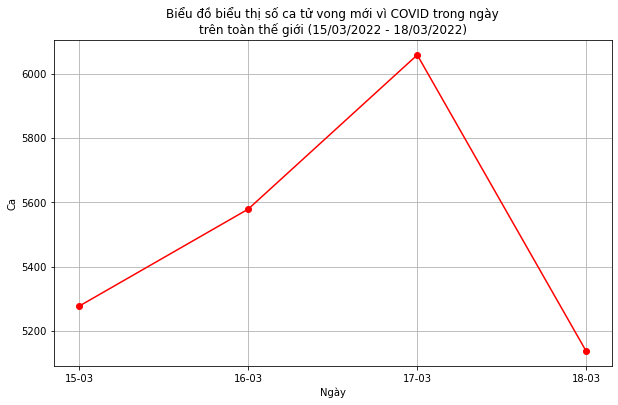

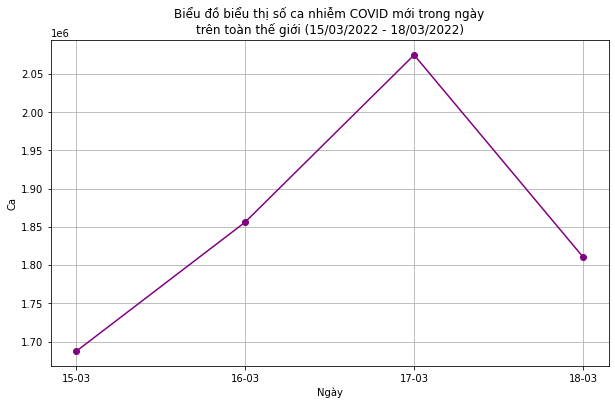

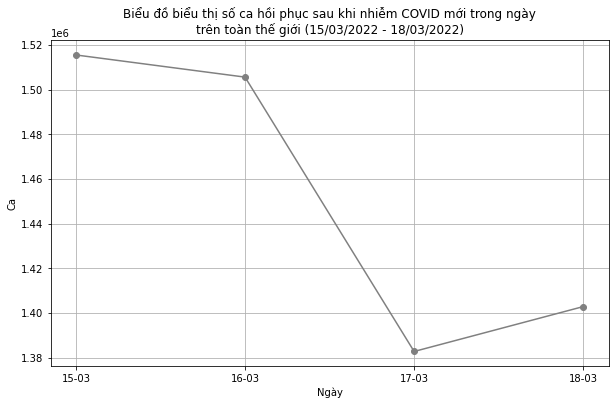

In [14]:
new_case = []
new_death = []
new_recovered = []

plt.rcParams["figure.figsize"] = [10,6]

for i in range(0, number_of_day):
    new_case.append(list_continent_data[i]['NewCases'][7])
    new_death.append(list_continent_data[i]['NewDeaths'][7])
    new_recovered.append(list_continent_data[i]['NewRecovered'][7])


plt.plot(day_list, new_death, color='red', marker='o')
plt.title('Biểu đồ biểu thị số ca tử vong mới vì COVID trong ngày\ntrên toàn thế giới (15/03/2022 - 18/03/2022)')
plt.xlabel('Ngày')
plt.ylabel('Ca')
plt.grid(True)
plt.show()


plt.plot(day_list, new_case, color='purple', marker='o')
plt.title('Biểu đồ biểu thị số ca nhiễm COVID mới trong ngày\ntrên toàn thế giới (15/03/2022 - 18/03/2022)')
plt.xlabel('Ngày')
plt.ylabel('Ca')
plt.grid(True)
plt.show()

plt.plot(day_list, new_recovered, color='grey', marker='o')
plt.title('Biểu đồ biểu thị số ca hồi phục sau khi nhiễm COVID mới trong ngày\ntrên toàn thế giới (15/03/2022 - 18/03/2022)')
plt.xlabel('Ngày')
plt.ylabel('Ca')
plt.grid(True)
plt.show()

- Dùng biểu đồ đường với giá trị ở cột `NewCases` của World qua các ngày để thể hiện rõ sự tăng giảm về số lượng ca như thế nào theo từng ngày   
Tương tự với cột `NewDeaths` và cột `NewRecovered`   
- Qua 3 biểu đồ thể hiện lần lượt số ca tử vong mới, số ca nhiễm mới và số ca hồi phục mới qua 4 ngày từ 15 đến 18 của tháng 3 thì ta thấy rằng:
> - Số ca tử vong mới tăng dần từ ngày 15 đến ngày 17 và đột ngột giảm xuống vào ngày 18.
> - Số ca mắc mới cũng tương tự khi tăng từ ngày 15 đến ngày 17 (tăng từ 1.7 triệu ca đến hơn 2 triệu ca) và đột ngột giảm xuống còn khoảng 1.8 triệu ca vào ngày 18.
> - Biểu đồ thể hiện số ca hồi phục mới có một chút khác biệt khi giảm từ ngày 15 tới ngày 17 và tăng nhẹ vào ngày 18.

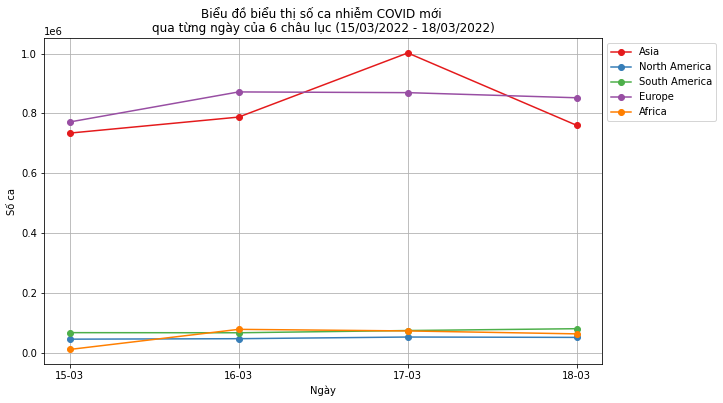

In [15]:
total_case = []
country = list_continent_data[0]['Country,Other'][0:6]

plt.rcParams["figure.figsize"] = [10,6]

for i in range(0, number_of_continent):
    t = []
    for day in range(0, number_of_day):
        t.append(list_continent_data[day]['NewCases'][i] )
    total_case.append(t)

palette = plt.get_cmap('Set1')

for line in range(number_of_continent):
    plt.plot(day_list, total_case[line], color=palette(line), marker='o', label=country[line])

plt.xlabel('Ngày')
plt.ylabel('Số ca')
plt.title('Biểu đồ biểu thị số ca nhiễm COVID mới \nqua từng ngày của 6 châu lục (15/03/2022 - 18/03/2022)')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

- Sau khi nắm được tình hình toàn thế giới, phân tích vào từng châu lục bằng biểu đồ đường, biểu đồ bao gồm 6 đường là sự thay đổi về số ca mắc thêm qua các ngày của mỗi châu lục (tính trong 4 ngày)  
- Qua 4 ngày các châu lục có sự biến đổi số ca nhiễm:
    + Asia là châu lục có sự biến đổi lớn nhất khi tăng dần đến đỉnh vào ngày 17/3/2022 và đến ngày 18/3/2022 số ca nhiễm trong ngày đã gỉam và về lại mức ban đầu.
    + Europe có sự tăng từ ngày 15 qua ngày 16 và những ngày sau không có sự thay đổi đáng kể.
    + 4 châu lục còn lại có số ca nhiễm trong ngày là tương đối ít, sự biến thiên cũng không đáng kể.

### 2. Pie Chart

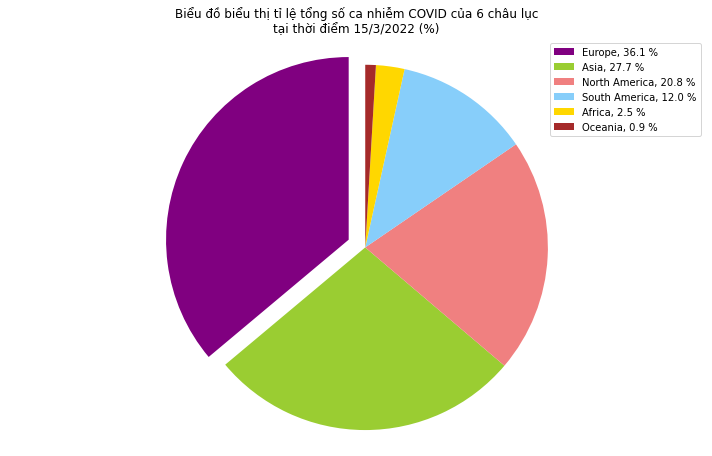

In [16]:
plt.rcParams["figure.figsize"] = [10,6]
data = list_continent_data[0].sort_values('TotalCases', ascending = False)
color = ['purple', 'yellowgreen', 'lightcoral', 'lightskyblue','gold','brown']
explode = (0.1,0,0,0,0,0)
size = data['TotalCases'][1:7]
legend = data['Country,Other'][1:7]

percents = size.to_numpy() * 100 / size.to_numpy().sum()
labels=['%s, %1.1f %%' % (l, s) for l, s in zip(legend, percents)]

patches, texts = plt.pie(size, colors=color,explode=explode, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Biểu đồ biểu thị tỉ lệ tổng số ca nhiễm COVID của 6 châu lục\ntại thời điểm 15/3/2022 (%)')
plt.show()

- Vào chi tiết hơn, biểu đồ tròn sẽ thể hiện rõ được tỉ lệ giữa các châu lục với nhau về tổng số ca
- Europe là châu lục đứng đầu với hơn 36% cách khá xa các châu lục còn lại, chứng tỏ châu lục này vẫn chưa thật sự vượt qua đại dịch.
- Kế đến là Asia-Châu lục đông dân nhất thế giới vẫn đang trong giai đoạn chống dịch.
- Thứ tự ca nhiễm trên pie chart cũng phản ánh rõ thực tế tình trạng dịch bệnh ở thế giới, kết quả cho ra là đúng với kỳ vọng.

### 3. Bar Chart

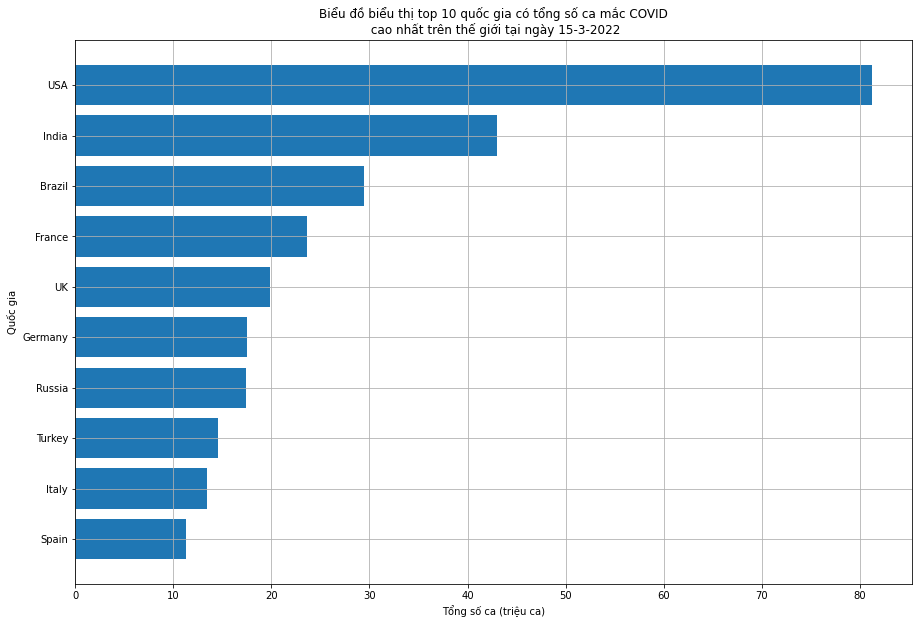

In [17]:
N = 10
plt.rcParams["figure.figsize"] = [15,10]
data = list_country_data[0].sort_values('TotalCases', ascending = False)
total_case = list(data['TotalCases']/10**6)[0:N][::-1]
country = list(data['Country,Other'])[0:N][::-1]

plt.barh(country, total_case)
plt.xlabel('Tổng số ca (triệu ca)')
plt.ylabel('Quốc gia')
plt.title('Biểu đồ biểu thị top 10 quốc gia có tổng số ca mắc COVID\n cao nhất trên thế giới tại ngày 15-3-2022')
plt.grid(True)
# Show graphic
plt.show()

- Sử dụng biểu đồ cột ngang để biểu thị số liệu về tổng số ca của top 10 các nước có tổng số ca cao nhất vì tên của các quốc gia khá dài để dọc, và nhìn vào biết rằng còn thêm nhiều quốc gia ở dưới nữa
- Các quốc gia trong top 10 đa phần đều thuộc châu Âu và châu Mỹ.
- USA ở vị trí đầu tiên với số ca nhiễm cao ngất ngưỡng hơn 80 triệu ca.
- Chỉ có India và Turkey là thuộc châu Á. Đặc biệt là India với hơn 40 triệu ca.
- Biểu đồ phản ánh rõ thực tế và không có sự bất hợp lý nào đối với sự hiểu biết của mọi người về dịch bệnh hiện nay.

### 4. Histogram

- Để có cái nhìn rõ hơn về tình hình chung của các nước trên toàn thế giới, ta xem sự phân
bố của các quốc gia về số ca nhiễm, số ca tử vong và số lần test COVID như thế nào qua các
biến statistics `Tot Cases/1M pop`, `Deaths/1M pop`, `Tests/1M pop` bằng biểu đồ
histogram và tính mean và median của chúng

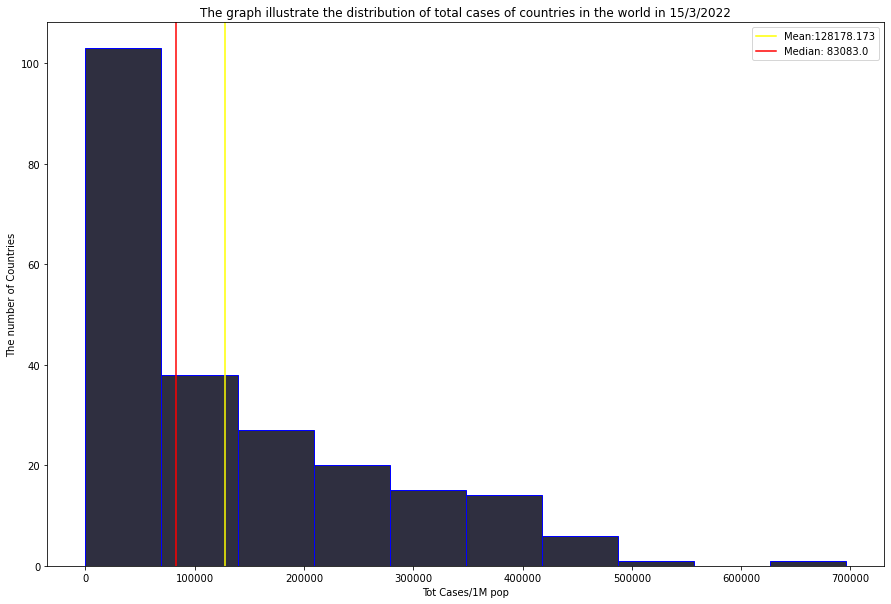

In [18]:
'''Tot Cases/1M pop - AllCountry-Histogram'''
plt.rcParams["figure.figsize"] = [15,10]

plt.hist(country_data['Tot Cases/1M pop'], edgecolor='blue',color='#2F2F40')
plt.xlabel('Tot Cases/1M pop')
plt.ylabel('The number of Countries')
plt.title('The graph illustrate the distribution of total cases of countries in the world in 15/3/2022')
plt.axvline(country_data['Tot Cases/1M pop'].mean(), color='yellow', label=f"Mean:{round(country_data['Tot Cases/1M pop'].mean(),3)}")
plt.axvline(country_data['Tot Cases/1M pop'].median(), color='red', label= f"Median: {country_data['Tot Cases/1M pop'].median()}")
plt.legend()

plt.show()

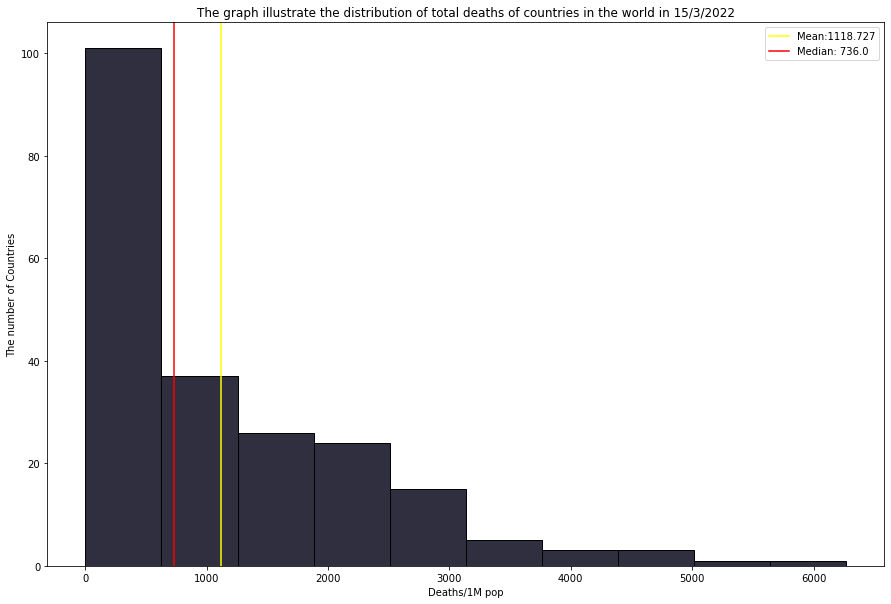

In [19]:
'''Deaths/1M pop - AllCountry-Histogram'''
plt.rcParams["figure.figsize"] = [15,10]

plt.hist(country_data['Deaths/1M pop'], edgecolor='black',color='#2F2F40')
plt.xlabel('Deaths/1M pop')
plt.ylabel('The number of Countries')
plt.title('The graph illustrate the distribution of total deaths of countries in the world in 15/3/2022')
plt.axvline(country_data['Deaths/1M pop'].mean(), color='yellow', label=f"Mean:{round(country_data['Deaths/1M pop'].mean(),3)}")
plt.axvline(country_data['Deaths/1M pop'].median(), color='red', label= f"Median: {country_data['Deaths/1M pop'].median()}")
plt.legend()

plt.show()

- Biều đồ histogram thể hiện sự phân bố số ca nhiễm / 1 triệu dân của các nước trên thế giới cho chúng ta thấy rằng khoảng gần 140 nước có số ca nhiễm dưới 1000 ca / 1 triệu dân, từ 2000 ca - 4000 ca / 1 triệu dân có khoảng 60 nước, Còn lại là các nước có số ca lớn hơn 4000/ 1 triệu dân. 
- Mean và Meadian của biểu đồ histogram này lần lượt là 1113.5 và 718, nằm trong khoảng 40 nước có số ca 1000 ca / 1 triệu dân, tức là cứ 1000 người thì lại có 1 người mắc Covid, tỉ lệ khá cao.

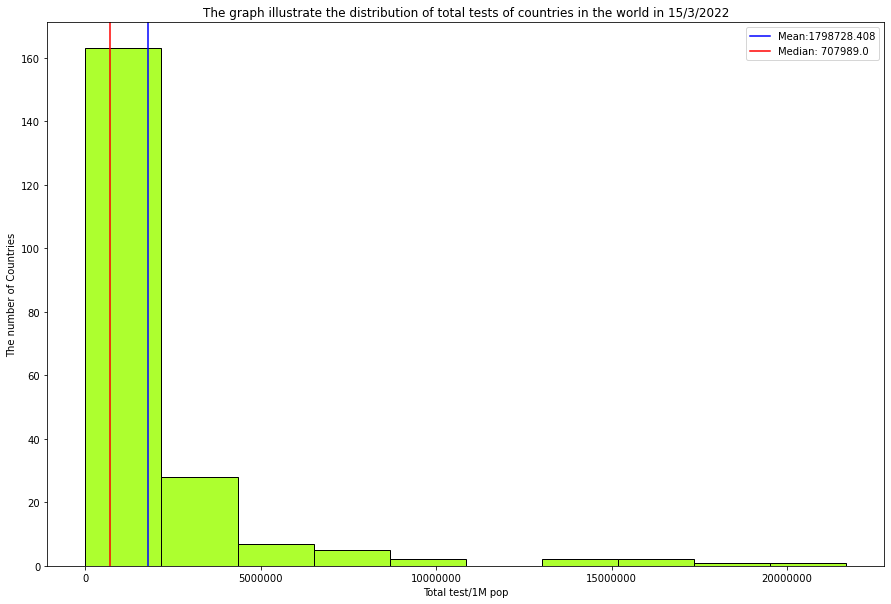

In [20]:
'''Tests/1M pop-AllCountry-Histogram'''
plt.rcParams["figure.figsize"] = [15,10]

plt.hist(country_data['Tests/1M pop'], edgecolor='black',color='#ADFF2F')
plt.xlabel('Total test/1M pop')
plt.ylabel('The number of Countries')
plt.title('The graph illustrate the distribution of total tests of countries in the world in 15/3/2022')
plt.axvline(country_data['Tests/1M pop'].mean(), color='blue', label=f"Mean:{round(country_data['Tests/1M pop'].mean(),3)}")
plt.axvline(country_data['Tests/1M pop'].median(), color='red', label= f"Median: {country_data['Tests/1M pop'].median()}")
plt.legend()
plt.ticklabel_format(style='plain',axis='x')

plt.show()

- Ở biểu đồ thể hiện sự phân bố tổng số test / 1 triệu dân của các nước, từ 0 - 5 triệu test/1triệu dân có tỉ trọng cao với khoảng gần 200 quốc gia, còn lại từ 5 triệu test/1triệu dân trở lên chỉ có một vài nước đạt được.
- Nhưng điều đó cũng chứng tỏ tỉ lệ xét nghiệm ở các nước có tỉ lệ rất tốt khi trung bình cứ 1 người thì được xét nghiệm 5 lần.

---

### 6. 100% stacked bar chart
TotalCases $\approx$ TotalDeaths + TotalRecovered + ActiveCases + Serious,Critical

Ta thấy rằng TotalCases $\approx$ TotalDeaths + TotalRecovered + ActiveCases + Serious,Critical, từ đó để xem rằng liệu tỉ lệ TotalDeaths + TotalRecovered + ActiveCases + Serious,Critical có sự khác nhau giữa các châu lục hay các nước với nhau hay không, ta sử dụng biểu đồ 100% stacked bar chart.

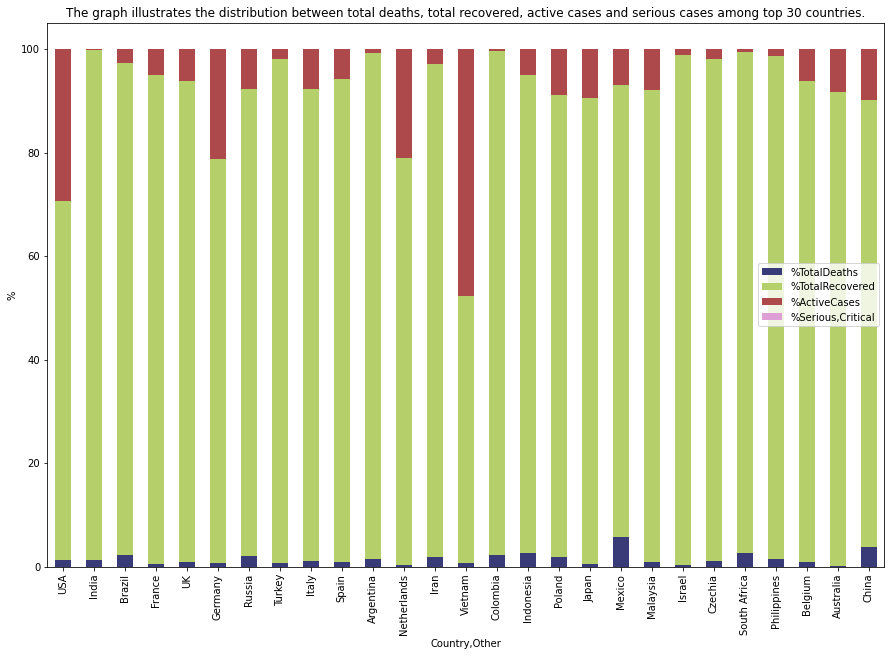

In [21]:
df1 = country_data[['Country,Other','TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical']]
df1 = df1[:30]

df1['%TotalDeaths'] = (df1['TotalDeaths'] / (df1['TotalDeaths'] + df1['TotalRecovered'] + df1['ActiveCases'] +  df1['Serious,Critical']))*100
df1['%TotalRecovered'] = (df1['TotalRecovered'] / (df1['TotalDeaths'] + df1['TotalRecovered'] + df1['ActiveCases'] +  df1['Serious,Critical']))*100
df1['%ActiveCases'] = (df1['ActiveCases'] / (df1['TotalDeaths'] + df1['TotalRecovered'] + df1['ActiveCases'] +  df1['Serious,Critical']))*100
df1['%Serious,Critical'] = (100 - df1['%TotalDeaths'] - df1['%TotalRecovered'] - df1['%ActiveCases'])

df1 = df1.set_index('Country,Other')
df1 = df1.sort_values('TotalCases',axis=0, ascending=False)
df1.dropna(inplace=True)

plt.rcParams["figure.figsize"] = [15,10]
df1[['%TotalDeaths','%TotalRecovered','%ActiveCases','%Serious,Critical']].plot(kind='bar',stacked=True, colormap='tab20b', width=0.5)
plt.ylabel('%')
plt.legend()
plt.title('The graph illustrates the distribution between total deaths, total recovered, active cases and serious cases among top 30 countries.')

plt.show()

- Ở biểu đồ 100% stacked bar biểu diễn lần lượt số ca tử vong, số ca đã khỏi, số ca đang điều trị và số ca nặng ở 30 quốc gia có số ca mắc cao nhất thì ta nhìn thấy rõ nhất là Hàn Quốc và Việt Nam có số ca đang nhiễm Covid chiếm tỉ lệ rất lớn(phần cột màu hồng), còn lại các nước khác có tỉ lệ số ca đã hồi phục cao(phần màu xanh).
- Số ca tử vong ta có thể nhìn thấy rõ nhất là ở Mexico, Indonesia, Nam Phi và Trung Quốc.
- Số ca nặng hầu như không được thể hiện rõ ở trong biểu đồ này, do tỉ lệ số ca nặng là rất ít so với các cột khác.

In [22]:
df1.sort_values('%Serious,Critical',ascending=False).head()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",%TotalDeaths,%TotalRecovered,%ActiveCases,"%Serious,Critical"
"Country,Other",,,,,,,,,
Mexico,5607845,321115.0,4900680.0,386050.0,4798.0,5.721280,87.315014,6.878221,0.085486
Vietnam,6552918,41545.0,3383142.0,3128231.0,4269.0,0.633580,51.594411,47.706905,0.065104
Indonesia,5914532,152745.0,5462344.0,299443.0,2771.0,2.581328,92.311379,5.060464,0.046829
Iran,7130129,139180.0,6791854.0,199095.0,2531.0,1.951306,95.221895,2.791315,0.035485
Brazil,29432274,655649.0,27968811.0,807814.0,8318.0,2.227024,95.000844,2.743878,0.028254


Nhìn vào bảng số liệu này thì % số ca nặng chỉ chiếm cao nhất là 0.89% ở Việt Nam, chưa được 1% nên không được thể hiện rõ ở biểu đồ 100% stacked bar chart trên.

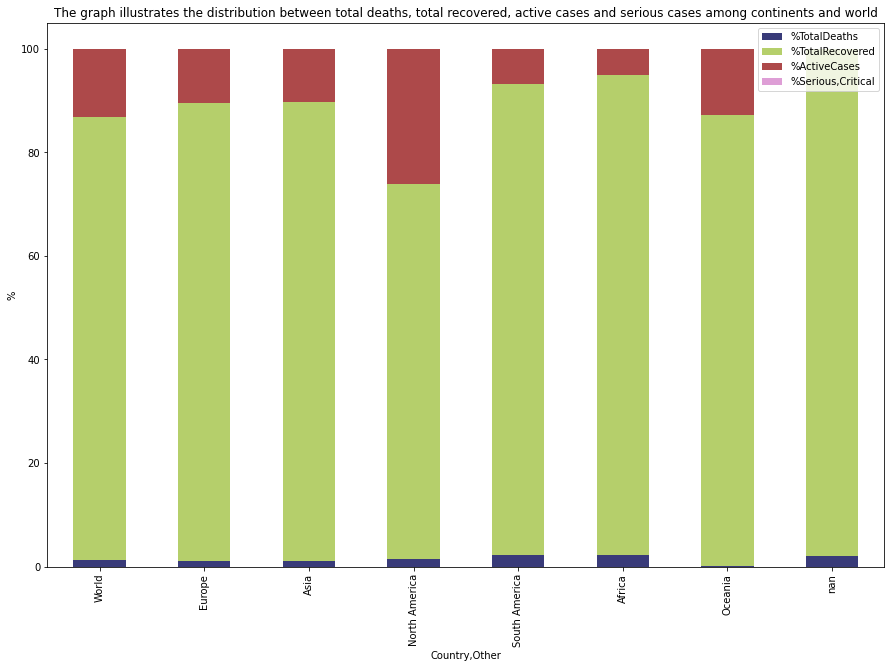

In [23]:
df2 = continent_data[['Country,Other','TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical']]

df2['%TotalDeaths'] = (df2['TotalDeaths'] / (df2['TotalDeaths'] + df2['TotalRecovered'] + df2['ActiveCases'] +  df2['Serious,Critical']))*100
df2['%TotalRecovered'] = (df2['TotalRecovered'] / (df2['TotalDeaths'] + df2['TotalRecovered'] + df2['ActiveCases'] +  df2['Serious,Critical']))*100
df2['%ActiveCases'] = (df2['ActiveCases'] / (df2['TotalDeaths'] + df2['TotalRecovered'] + df2['ActiveCases'] +  df2['Serious,Critical']))*100
df2['%Serious,Critical'] = (100 - df2['%TotalDeaths'] - df2['%TotalRecovered'] - df2['%ActiveCases'])

df2 = df2.set_index('Country,Other')
df2 = df2.sort_values('TotalCases',axis=0, ascending=False)
df2.dropna(inplace=True)

plt.rcParams["figure.figsize"] = [15,10]
df2[['%TotalDeaths','%TotalRecovered','%ActiveCases','%Serious,Critical']].plot(kind='bar',stacked=True, colormap='tab20b', width=0.5)
plt.ylabel('%')
plt.legend()
plt.title('The graph illustrates the distribution between total deaths, total recovered, active cases and serious cases among continents and world')

plt.show()

- Biểu đồ 100% stacked bar chart thể hiện tỉ lệ số ca tử vong, số ca đã khỏi, số ca đang điều trị và số ca nặng giữa các châu lục so với thế giới, ta thấy rằng Bắc Mỹ là nơi có số ca đang điều trị là lớn nhất, chiếm khoảng 30%. Còn về phần tỉ lệ tử vong, các châu lục có tỉ lệ tử vong tương tự nhau với khoảng dưới 5%.

In [24]:
df2

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",%TotalDeaths,%TotalRecovered,%ActiveCases,"%Serious,Critical"
"Country,Other",,,,,,,,,
World,461532468,6073216,394866767,60592485,64552,1.315697,85.543613,13.126706,0.013984
Europe,166597033,1743316,147327746,17525971,11844,1.046352,88.427309,10.519230,0.007109
Asia,127820351,1376074,113342911,13101366,29002,1.076325,88.653488,10.247503,0.022685
North America,95805128,1424686,69309904,25070538,9668,1.486916,72.337371,26.165623,0.010090
South America,55352084,1269021,50325708,3757355,12367,2.292122,90.898956,6.786584,0.022337
Africa,11645050,251809,10804954,588287,1512,2.162089,92.773764,5.051164,0.012982
Oceania,4312101,8295,3754838,548968,159,0.192359,87.073553,12.730401,0.003687
NaN,721,15,706,0,0,2.080444,97.919556,0.000000,0.000000


---

## BIỂU DIỄN CÁC QUAN HỆ

### 1. Scatter Plot

Sử dụng biểu đồ Scatter plots hiển thị các điểm dữ liệu là các quốc gia trên toàn thế giới
dựa trên hai thuộc tính để xem mối liên hệ giữa hai trường dữ liệu

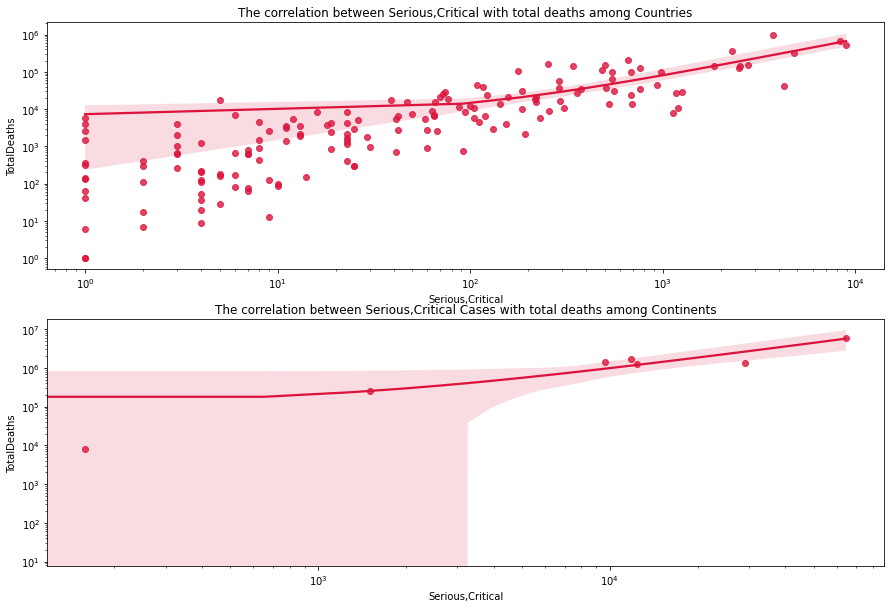

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.set_yscale('log')
ax2.set_yscale('log')
sns.regplot(x='Serious,Critical',y='TotalDeaths', data=country_data,color='#DC143C', ax=ax1).set(title='The correlation between Serious,Critical with total deaths among Countries')
sns.regplot(x='Serious,Critical',y='TotalDeaths', data=continent_data,color='#DC143C', ax=ax2).set(title='The correlation between Serious,Critical Cases with total deaths among Continents');

- Ta thấy ở biểu đồ sự tương quan giữa số ca nặng(Serious,Critical) và số ca tử vong(TotalDeaths) thì biểu đồ thể hiện giữa các nước có nhiều outlier ==> không có nhiều sự tương quan giữa 2 trường dữ liệu này ở bảng dữ liệu giữa các nước.
- Còn đối với biểu đồ giữa các châu lục thì ta thấy rằng sự có nhiều sự tương quan hơn.
Cho nên vẫn chưa thế kết luận được rằng liệu số ca nặng tăng thì số ca tử vong có tăng lên hay không.

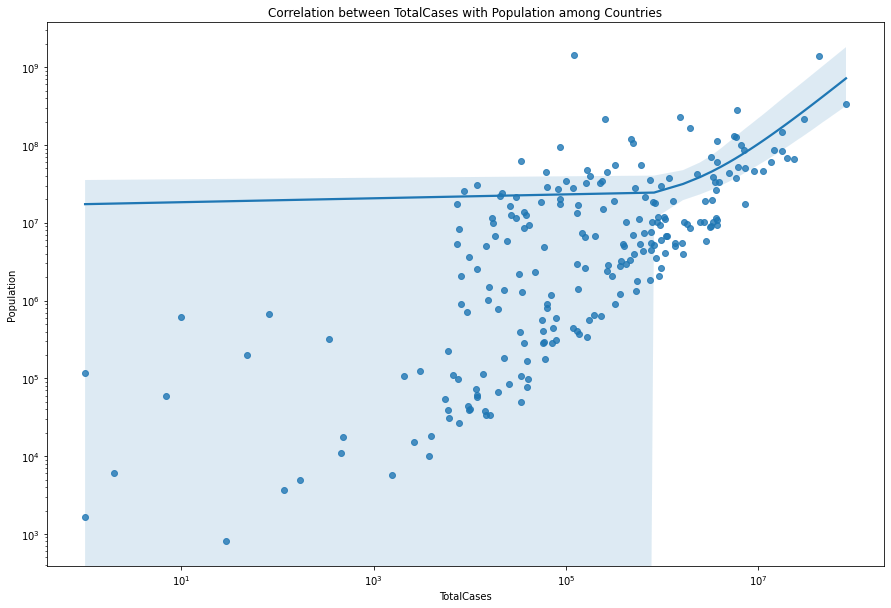

In [26]:
'''Total Cases vs Population'''

sns.regplot(x='TotalCases',y='Population',data=country_data).set(title='Correlation between TotalCases with Population among Countries')
plt.ticklabel_format(style='plain',axis='y')
plt.ticklabel_format(style='plain',axis='x')

plt.xscale('log')
plt.yscale('log')

Ta thấy rằng có rất ít sự liên quan giữa tổng số ca nhiễm và dân số của nước đó. Theo như biểu đồ scatter trên, các điểm hầu hết tập trung ở quanh vị trí 10 triệu ca nhiễm và 25 triệu dân, càng đi ra xa số điêm càng thưa dần và xuất hiện một số outlier. $\rightarrow$ Không có sự liên quan giữa số ca nhiễm và số dân của các nước.

---

### 2. Heatmap 

Sử dụng biểu đồ heatmap để thể hiện sự tương quan giữa các cột biến.

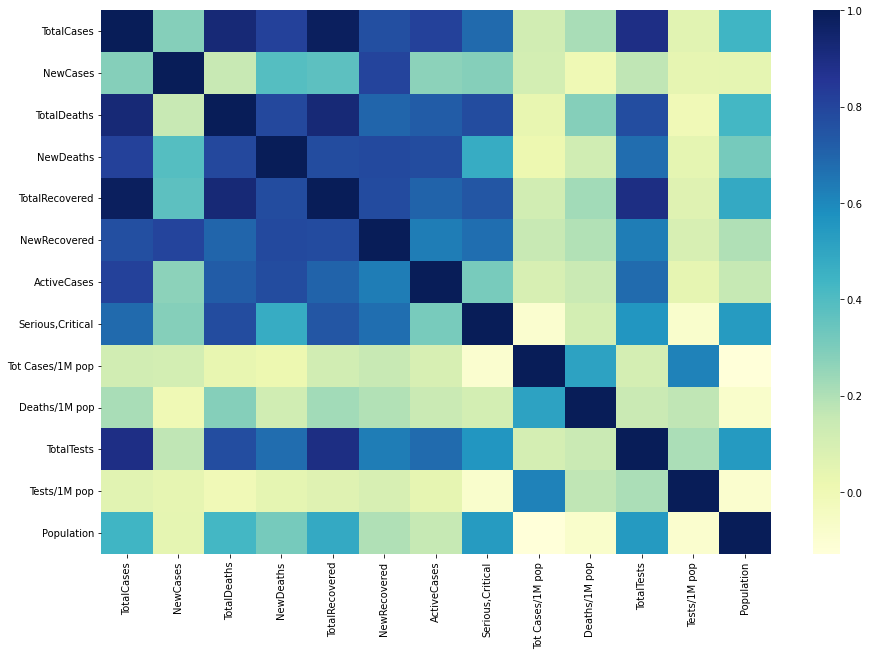

In [27]:
corr = country_data.drop(columns=['#']).corr()
sns.heatmap(corr, cmap = "YlGnBu" )
#plt.title('Hệ số tương quan giữa các cột với nhau', size = 20)
plt.show()

Qua heatmap về độ tương quan của các biến trên ta thấy được các cột **TotalCases, NewCases, TotalDeaths, NewDeaths, TotalRecovered, NewRecovered	ActiveCases, Serious,Critical, TotalTests** có sự tương quan khá cao. Ngoài ra còn mối tương quan giữa biến **Tot Cases/1M pop và Deaths/1M pop** cũng thể hiện khá rõ ràng.

---

### 3. Bubble plot

Bubble plot cũng được sử dụng để thể hiện sự liên quan giữa các biến với nhau, nhưng điều khác ở đây là vừa sử dụng scatter plot bằng các chấm vừa sử dụng kích thước các chấm đó để thể hiện mối quan hệ.

In [28]:
def draw_BubblePlot(list_attr, name, data):
    plt.xscale(value='log')
    plt.yscale(value='log')
    sns.scatterplot(data=data, x=list_attr[0], y=list_attr[1], size=list_attr[2], sizes=(20, 2000), alpha = 0.5, hue='Continent', legend=True)
    plt.title(" and ".join(list_attr))
    plt.legend(bbox_to_anchor=(1.01, 1))
    #plt.savefig(f"Graphs/bubble_plot_of_{name}_in_the_world")
    plt.show()

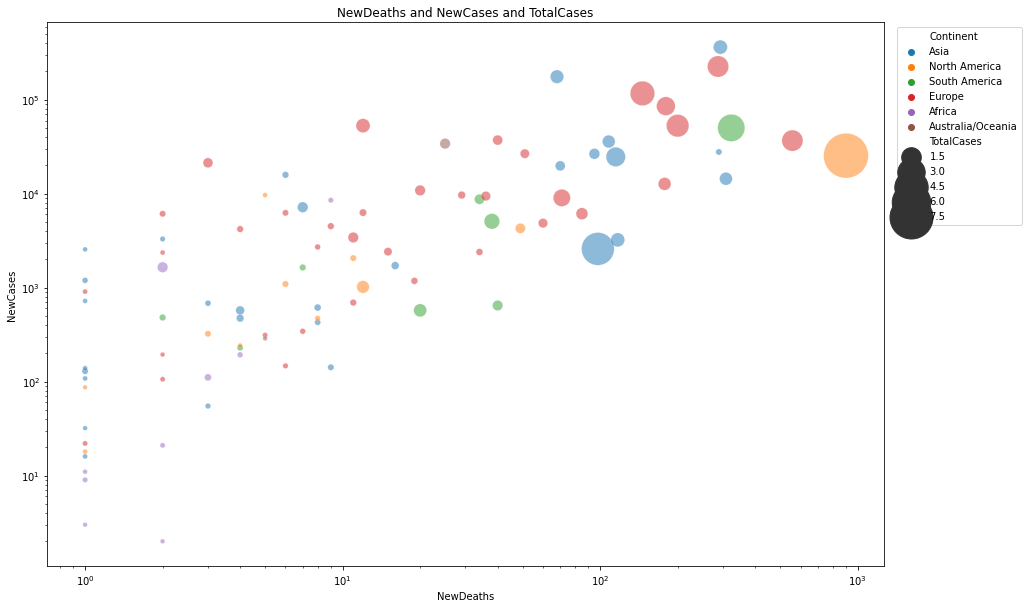

In [29]:
draw_BubblePlot(['NewDeaths','NewCases','TotalCases'], "Population_and_Total_cases_and_Deaths_1M pop",country_data)

- Biểu đồ trên thể hiện mối tương quan giữa số ca mắc mới và số ca tử vong mới. Độ to nhỏ của mỗi điểm dữ liệu phụ thuộc vào tổng số ca mắc của mỗi nước.
- Mối quan giữa số ca mắc mới và ca tử vong mới mỗi ngày cũng có một mối tương quan khá rõ với nhau. Các nước có số ca mắc mới mỗi ngày cao đều có số ca tử vong cũng không hề nhỏ.
- Tuy nhiên có cũng có một số nước tuy số ca nhiễm mới tăng nhưng số ca tử vong gần như là khá thấp. Điều này chứng tỏ thế giới đã có những kinh nghiệm nhất định để hạn chế số lượng người tử vong trong thời buổi đại dịch khó khăn như hiện nay.
- Trong đó các châu lục có số lượng người mắc mới và tử vong cao là Bắc Mỹ, Châu Âu và châu Á. Trong khi đó châu Phi lại có nhiều nước có ca mắc và ca tử vong mới khá thấp so với các nước ở những châu lục còn lại.
- Các nước có tổng số ca mắc nhiều sẽ có nhiều ca mắc mới lẫn ca tử vong nhiều hơn.

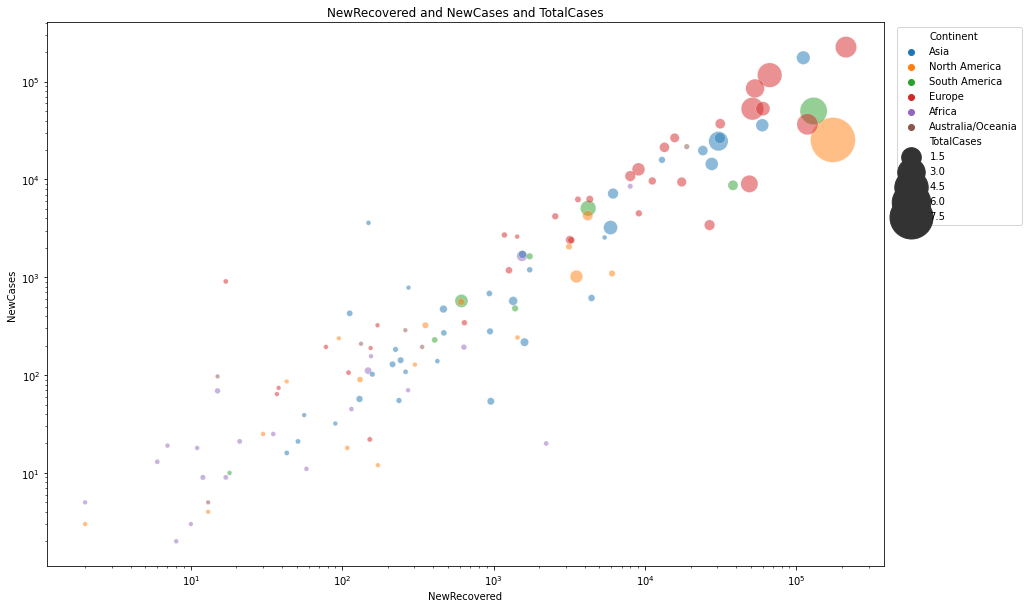

In [30]:
draw_BubblePlot(['NewRecovered','NewCases','TotalCases'], "Population_and_Total_cases_and_Deaths_1M pop",country_data)

- Biểu đồ trên thể hiện mối tương quan giữa số ca mắc mới và số ca hồi phục mới. Độ to nhỏ của mỗi điểm dữ liệu phụ thuộc vào tổng số ca mắc của mỗi nước.
- Mối quan hệ giữa 2 cột này có mối tương quan dương khá rõ ràng. Những nước có số ca mắc mới cao mỗi ngày thì cũng có số ca hồi phục mới cũng tăng theo. Điều này chứng tỏ rằng mặc dù thế giới vẫn đang trong tình trạng phức tạp của dịch bệnh do số ca mắc mới tăng cao nhưng mỗi số người khỏi bệnh cũng ngày càng nhiều sẽ giúp cho cơ sở y tế của các quốc gia không bị quá tải về số người điều trị cũng như mở ra cơ hội nghiên cứu thêm để tìm ra giải pháp chữa bệnh từ những người khỏi bệnh.
- Các nước có tổng số ca mắc nhiều vẫn đang có xu hướng có nhiều ca mắc mới và ca khỏi bệnh mới nhiều hơn các nước còn lại.

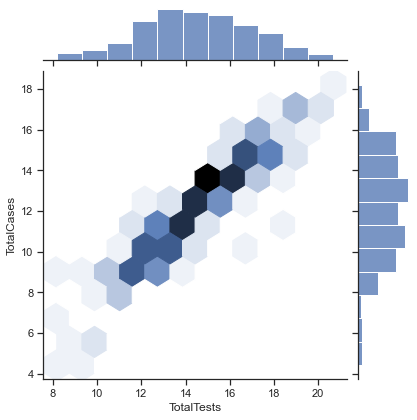

In [31]:
sns.set_theme(style="ticks")
rs = np.random.RandomState(11)
x = np.log(country_data['TotalTests'])
y = np.log(country_data['TotalCases'])

sns.jointplot(x=x, y=y, kind="hex");

- Biểu đồ trên thể hiện mối quan hệ giữa Tổng số ca và tổng số lần Test.
- Hai biến này có một mối tương quan dương với nhau
- Trong thực tế nếu như ta test càng nhiều thì sẽ càng phát hiện ra nhiều ca nhiễm trong cộng đồng.
- Tuy nhiên nhờ có Test nhiều các trường hợp covid mà ta có thể kịp thời nhanh chóng cách ly và tránh làm gây bùng dịch trong cộng đồng.

---

### 4. New Pie Chart

Pie chart này cho ta biết thêm được các thành phần bên trong các số ca nhiễm như: Ca nhiễm đang điều trị, Ca nhiễm đã khỏi và tử vong.
- Riêng trong những ca đang điều trị còn có tỉ lệ thành phần của số ca mắc đang trong tình trạng nguy kịch.
- Đa số các ca mắc đa số đều đã được hồi phục *85.56%*, tỉ lệ tử vong + số ca trở nặng ngày càng giảm đi chỉ chiếm *1.32%* và *0.1%* cũng cho thấy được rằng con người đã có thể hạn chế được phần nào sự nguy hiểm của Virus.

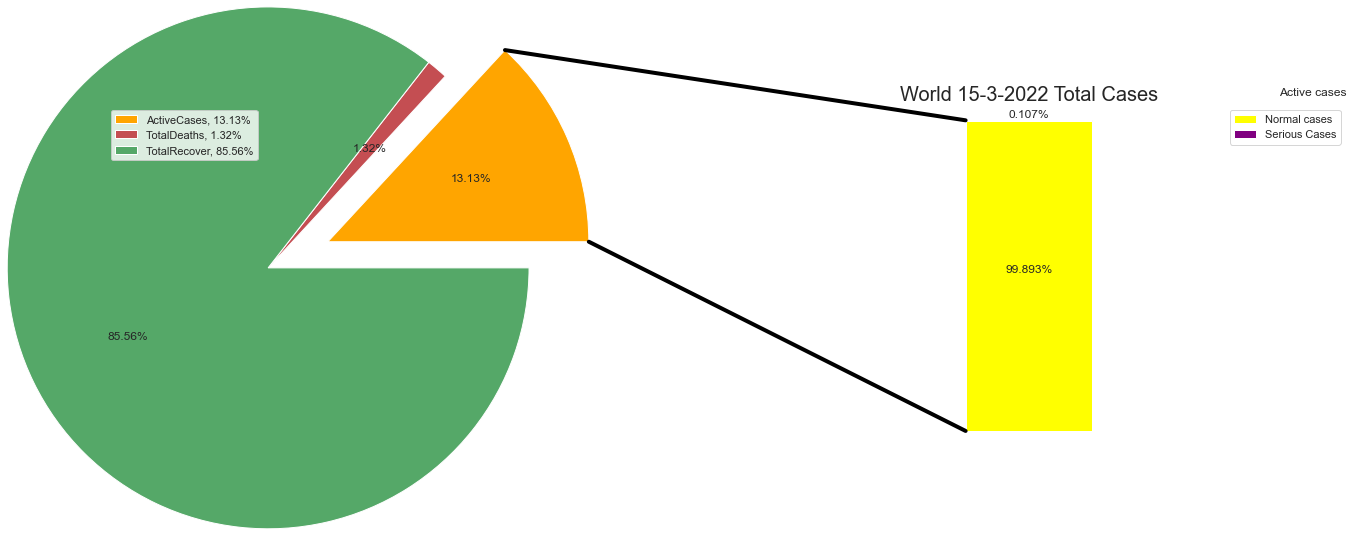

In [32]:
from matplotlib.patches import ConnectionPatch

World_temp = continent_data.iloc[-1]
x = np.array([World_temp['ActiveCases'], World_temp['TotalDeaths'], World_temp['TotalRecovered']])
labels = ['ActiveCases', 'TotalDeaths','TotalRecover']
explode = [0.5, 0, 0]
colors = ['orange', 'r', 'g']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,6))
angle = 180 * x[1]
ax1.pie(x, explode=explode, colors=colors, radius=2, startangle=angle, autopct='%1.2f%%')
ax1.legend(labels = [f'{l}, {round((r*100 / np.sum(x)), 2)}%'for l,r in zip(labels, x)])

xpos = 0
bottom = 0
width = .2
color2 = ['yellow', 'purple']
active_case = np.array([1 - (World_temp['Serious,Critical'] / World_temp['ActiveCases']), World_temp['Serious,Critical'] / World_temp['ActiveCases']] )
for i in range(len(active_case)):
    height = active_case[i]
    ax2.bar(xpos, height, width, bottom=bottom, color=color2[i])
    ypos = bottom + ax2.patches[i].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos + 0.01, "%1.3f%%" % (ax2.patches[i].get_height() * 100),
             ha='center')
ax2.set_title('Active cases', loc='right')
ax2.legend(('Normal cases', 'Serious Cases'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.title('World 15-3-2022 Total Cases', va='center', size=20 )
plt.show()

### 5.Circular Packing

- Biểu đồ này nhằm thể hiện số lượng ca mắc giữa các châu lục, quốc gia 1 cách rõ ràng hơn thông qua kích cỡ giữa các hình tròn mà không cần phải chia ra nhiều biểu đồ cột.
- Đây là biểu đồ trong đóng gói thể hiện tỉ lệ tổng số ca mắc ở mỗi châu lục trên toàn thế giới.
- Trong đó mỗi châu lục chọn ra 3 quốc gia có tổng số ca mắc nhiều nhất.
- Ta thấy châu Âu có tổng số ca mắc nhiều nhất trong số tất cả các châu lục. Tuy nhiên những nước như Mỹ và Ấn Độ lại là những nước không thuộc châu Âu nhưng lại có số ca mắc vượt trội hơn các nước còn lại.
- Châu Úc và châu Đại Dương có số ca mắc ít nhất so với phần còn lại của thế giới.

In [33]:
country_data[country_data['Continent'] == 'North America'].sort_values(by='TotalCases', ascending=False).head(3)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
1,2.0,USA,81244936,25359.0,992302.0,901.0,56456450.0,174444.0,23796184.0,3726.0,243030.0,2968.0,967406638.0,2893828.0,334300023.0,North America
20,21.0,Mexico,5607845,1018.0,321115.0,12.0,4900680.0,3525.0,386050.0,4798.0,42732.0,2447.0,15355108.0,117006.0,131233677.0,North America
31,32.0,Canada,3373776,4274.0,36993.0,49.0,3222524.0,4186.0,114259.0,510.0,88078.0,966.0,58805098.0,1535210.0,38304275.0,North America


In [34]:
country_data[country_data['Continent'] == 'Asia'].sort_values(by='TotalCases', ascending=False).head(3)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
2,3.0,India,42998646,2584.0,516103.0,98.0,42446171.0,NaN,36372.0,8944.0,30647.0,368.0,779754156.0,555756.0,1.403051e+09,Asia
8,9.0,Turkey,14600683,24614.0,96735.0,115.0,14213445.0,30553.0,290503.0,975.0,170012.0,1126.0,149168647.0,1736932.0,8.588056e+07,Asia
13,14.0,S. Korea,7228550,362328.0,10888.0,293.0,NaN,NaN,NaN,1196.0,140786.0,212.0,15804065.0,307807.0,5.134415e+07,Asia


In [35]:
country_data[country_data['Continent'] == 'Africa'].sort_values(by='TotalCases', ascending=False).head(3)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
25,26.0,South Africa,3696823,1648.0,99727.0,2.0,3578877.0,1539.0,18219.0,546.0,61025.0,1646.0,23452959.0,387148.0,60578717.0,Africa
51,52.0,Morocco,1162236,111.0,16046.0,3.0,1145486.0,148.0,704.0,293.0,30867.0,426.0,11237010.0,298431.0,37653636.0,Africa
56,57.0,Tunisia,1029762,NaN,28065.0,NaN,983630.0,NaN,18067.0,74.0,85609.0,2333.0,4475031.0,372030.0,12028676.0,Africa


In [36]:
country_data[country_data['Continent'] == 'Europe'].sort_values(by='TotalCases', ascending=False).head(3)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
4,5.0,France,23649615,116618.0,140440.0,146.0,22327945.0,66648.0,1181230.0,1855.0,360959.0,2144.0,246629975.0,3764257.0,65518893.0,Europe
5,6.0,UK,19820181,52822.0,163095.0,200.0,18429633.0,51258.0,1227453.0,253.0,289380.0,2381.0,489876300.0,7152332.0,68491825.0,Europe
6,7.0,Germany,17567738,225387.0,126532.0,287.0,13714200.0,212800.0,3727006.0,2494.0,208546.0,1502.0,104701826.0,1242913.0,84239076.0,Europe


In [37]:
country_data[country_data['Continent'] == 'Australia/Oceania'].sort_values(by='TotalCases', ascending=False).head(3)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
28,29.0,Australia,3656931,34047.0,5616.0,25.0,3346229.0,NaN,305086.0,105.0,140638.0,216.0,64784755.0,2491490.0,26002413.0,Australia/Oceania
90,91.0,New Zealand,399342,21657.0,102.0,NaN,205975.0,18859.0,193265.0,NaN,79835.0,20.0,6842694.0,1367964.0,5002100.0,Australia/Oceania
133,134.0,French Polynesia,70826,390.0,645.0,NaN,NaN,NaN,NaN,7.0,249680.0,2274.0,NaN,NaN,283667.0,Australia/Oceania


In [38]:
country_data[country_data['Continent'] == 'South America'].sort_values(by='TotalCases', ascending=False).head(3)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
3,4.0,Brazil,29432274,50078.0,655649.0,323.0,27968811.0,130018.0,807814.0,8318.0,136814.0,3048.0,63776166.0,296459.0,215126183.0,South America
11,12.0,Argentina,8981155,5076.0,127295.0,38.0,8787789.0,4214.0,66071.0,761.0,195667.0,2773.0,34877407.0,759852.0,45900252.0,South America
16,17.0,Colombia,6077861,573.0,139335.0,20.0,5909782.0,613.0,28744.0,342.0,117324.0,2690.0,33566181.0,647945.0,51804094.0,South America


In [39]:
data = [{'id': 'World', 'datum': 453319288, 'children' : [
              {'id' : "North America", 'datum': 95589289,
                   'children' : [
                     {'id' : "United States", 'datum' : 81108786},
                     {'id' : "Mexico", 'datum' : 5583773},
                     {'id' : "Canada", 'datum' : 3350160} 
                   ]},
              {'id' : "South America", 'datum' : 55051080, 
                   'children' : [
                     {'id' : "Brazil", 'datum' : 29249903},
                     {'id' : "Argentina", 'datum' : 8961595},
                     {'id' : "Colombia", 'datum' : 6074874}
                   ]},
              {'id' : "Europe", 'datum' : 163226849	,  
                   'children' : [
                     {'id' : "France", 'datum' : 23308880},
                     {'id' : "UK", 'datum' : 19457976},
                     {'id' : "Russia", 'datum' : 17191300}
                   ]},
              {'id' : "Africa", 'datum' : 11611691,  
                   'children' : [
                     {'id' : "South Africa", 'datum' : 3690291},
                     {'id' : "Morocco", 'datum' : 1161925},
                     {'id' : "Tunisia", 'datum' : 1018447}
                   ]},
              {'id' : "Asia", 'datum' : 123778774,  
                   'children' : [
                     {'id' : "India", 'datum' : 42984261},
                     {'id' : "Turkey", 'datum' : 14488373},
                     {'id' : "Iran", 'datum' : 7113591}
                   ]},
              {'id' : "Australia/Oceania", 'datum' : 4060884,  
                   'children' : [
                     {'id' : "Australia", 'datum' : 3500734},
                     {'id' : "New Zealand", 'datum' : 307803},
                     
                   ]},
    ]}]

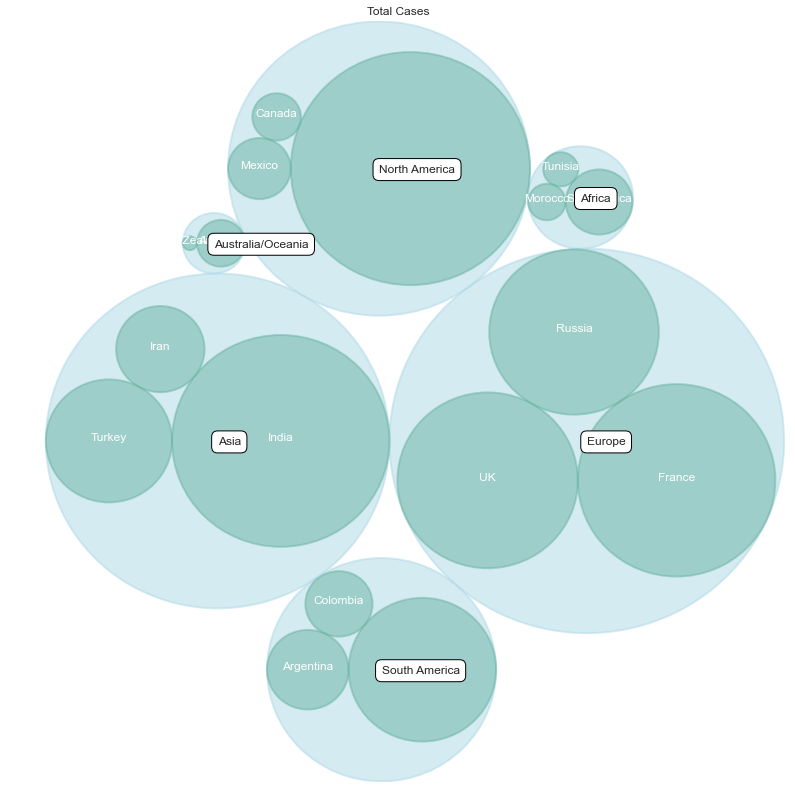

In [40]:
# import libraries
import circlify
import matplotlib.pyplot as plt

circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Total Cases')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center_baseline', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

# Reference

- Slide của bộ môn Trực quan hóa dữ liệu của thầy Bùi Tiến Lên.
- [Python graph gallery](https://python-graph-gallery.com)
- [Seaborn graph gallery](https://seaborn.pydata.org/examples/index.html)
- [Matplotlib examples](https://matplotlib.org/stable/gallery/)